# SVM implementation #

In [1]:
import os

import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Load Dateset #

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#data_path = '/content/drive/MyDrive/motionsense_dataset'
data_path = os.path.join(os.getcwd(), 'data')
save_path = os.path.join(os.getcwd(), 'temp_models')
print(os.listdir(data_path))

['dws_11', 'ups_12', '.DS_Store', 'wlk_7', 'std_14', 'wlk_15', 'wlk_8', 'dws_2', 'sit_13', 'jog_9', 'ups_3', 'ups_4', 'jog_16', 'dws_1', 'sit_5', 'std_6']


In [4]:
folders = glob(os.path.join(data_path,'*_*'))
folders = [s for s in folders if ("csv" not in s) or (".DS_Store" not in s) or (".ipynb" not in s)]
df_all_list = []
activity_codes = {'dws':0,'jog':1,'sit':2,'std':3,'ups':4,'wlk':5}
activity_decodes = {0:'dws',1:'jog',2:'sit',3:'std',4:'ups',5:'wlk'}
usr_cols = ['attitude.roll','attitude.pitch','attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z']
activity_types = list(activity_codes.keys())
print(folders)

['/Users/apple/Desktop/CG4002_Capstone/ML/data/dws_11', '/Users/apple/Desktop/CG4002_Capstone/ML/data/ups_12', '/Users/apple/Desktop/CG4002_Capstone/ML/data/wlk_7', '/Users/apple/Desktop/CG4002_Capstone/ML/data/std_14', '/Users/apple/Desktop/CG4002_Capstone/ML/data/wlk_15', '/Users/apple/Desktop/CG4002_Capstone/ML/data/wlk_8', '/Users/apple/Desktop/CG4002_Capstone/ML/data/dws_2', '/Users/apple/Desktop/CG4002_Capstone/ML/data/sit_13', '/Users/apple/Desktop/CG4002_Capstone/ML/data/jog_9', '/Users/apple/Desktop/CG4002_Capstone/ML/data/ups_3', '/Users/apple/Desktop/CG4002_Capstone/ML/data/ups_4', '/Users/apple/Desktop/CG4002_Capstone/ML/data/jog_16', '/Users/apple/Desktop/CG4002_Capstone/ML/data/dws_1', '/Users/apple/Desktop/CG4002_Capstone/ML/data/sit_5', '/Users/apple/Desktop/CG4002_Capstone/ML/data/std_6']


# SVM: Feature Extraction, Train and Test #

In [84]:
#For non NN model, e.x. SVM
#Window size 500, as still
window = 600
feature_n = 6
attributes = ['attitude.roll', 'attitude.pitch', 'attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z']
data_all_x_list = []
data_all_y_list = []
for j in folders:
    csv_list = glob(j + '/*')
    label = j.split('/')[-1].split('_')[0]
    for i in csv_list:
        df = pd.read_csv(i, usecols = ['attitude.roll', 'attitude.pitch', 'attitude.yaw','userAcceleration.x','userAcceleration.y','userAcceleration.z'])
        win_count = int(df.shape[0] / (window / 2)) - 1
        data_x = np.zeros((win_count, df.shape[1] * 5))
        data_y = np.zeros(win_count)

        length = len(df)
        for c in range(win_count):
            start_idx = int(c * (window / 2))
            end_idx = start_idx + window
            temp_list = []
            for k in range(feature_n):
                means = df[start_idx:end_idx][attributes[k]].mean()
                stds = df[start_idx:end_idx][attributes[k]].mean()
                mins = df[start_idx:end_idx][attributes[k]].min()
                maxs = df[start_idx:end_idx][attributes[k]].max()
                mads = df[start_idx:end_idx][attributes[k]].mad()
                temp_list.append(means)
                temp_list.append(stds)
                temp_list.append(mins)
                temp_list.append(maxs)
                temp_list.append(mads)
            #temp_list = np.concatenate(temp_list, axis = 0)
            data_x[c] = temp_list
            data_y[c] = activity_codes[label]
#         print(data_x.shape)
#         sys.exit(0)
        data_all_x_list.append(data_x)
        data_all_y_list.append(data_y)
data_all_x = np.concatenate(data_all_x_list,axis=0)
data_all_y = np.concatenate(data_all_y_list,axis=0)
data_all_y = data_all_y.astype(int)
print(data_all_x.shape)
print(data_all_y.shape)

(4174, 30)
(4174,)


In [85]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [86]:
train_x,test_x,train_y,test_y = train_test_split(data_all_x,data_all_y,test_size=0.2)
assert(len(train_x) == len(train_y))
assert(len(test_x) == len(test_y))
print(len(train_x), len(test_x))

3339 835


In [87]:
scoring = ['f1_macro', 'accuracy']
clf = LinearSVC(C=1, multi_class = 'ovr', random_state=0)
scores = cross_validate(clf, train_x, train_y, scoring=scoring,cv = None, return_estimator = True, return_train_score= True)

/Users/apple/opt/anaconda3/envs/orion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/apple/opt/anaconda3/envs/orion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/apple/opt/anaconda3/envs/orion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/apple/opt/anaconda3/envs/orion/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/apple/opt/anaconda3/envs/orion/lib/python3.8/site-pac

In [88]:
print(scores.keys())
print(f"Best epoch validation accuracy: {max(scores['test_accuracy'])}")
print(f"Best epoch validation f1_macro: {max(scores['test_f1_macro'])}")
print(f"Best epoch training accuracy: {max(scores['train_accuracy'])}")
print(f"Best epoch training f1_macro: {max(scores['train_f1_macro'])}")
best_estimator = np.argmax(scores['train_accuracy'])
print(f"Best epoch training accuracy occur at : {best_estimator}")

dict_keys(['fit_time', 'score_time', 'estimator', 'test_f1_macro', 'train_f1_macro', 'test_accuracy', 'train_accuracy'])
Best epoch validation accuracy: 0.9670658682634731
Best epoch validation f1_macro: 0.9498390868221022
Best epoch training accuracy: 0.9640718562874252
Best epoch training f1_macro: 0.9452430931188966
Best epoch training accuracy occur at : 4


In [89]:
pred_test_y = scores['estimator'][best_estimator].predict(test_x)
test_accuracy = accuracy_score(test_y, pred_test_y)
test_f1_macro = f1_score(test_y, pred_test_y, average = 'macro')
print(f"test_accuracy is {test_accuracy}")
print(f"test_f1_macro is {test_f1_macro}")

test_accuracy is 0.9508982035928144
test_f1_macro is 0.930891621331289


In [90]:
print(f"number of epochs trained : {len(scores['test_accuracy'])}")

number of epochs trained : 5


In [91]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

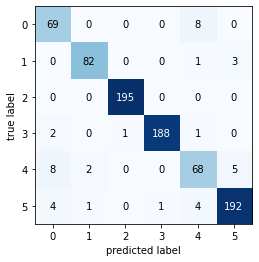

In [92]:
cm = confusion_matrix(y_target=test_y, 
                      y_predicted=pred_test_y, 
                      binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [93]:
test_df_dws = pd.read_csv(
    'data/dws_11/sub_1.csv',
    usecols = ['attitude.roll','attitude.pitch',
               'attitude.yaw','userAcceleration.x',
               'userAcceleration.y','userAcceleration.z']
)

In [94]:
_test_sample = test_df_dws[0:window]
temp_list = []
for k in range(feature_n):
    means = _test_sample[attributes[k]].mean()
    stds = _test_sample[attributes[k]].mean()
    mins = _test_sample[attributes[k]].min()
    maxs = _test_sample[attributes[k]].max()
    mads = _test_sample[attributes[k]].mad()
    temp_list.append(means)
    temp_list.append(stds)
    temp_list.append(mins)
    temp_list.append(maxs)
    temp_list.append(mads)
pred = scores['estimator'][best_estimator].predict(np.array( [temp_list,] ) )
print(pred)
print(f"This sample is a downstair motion, it is predicted to :{activity_decodes[pred[0]]}")

[0]
This sample is a downstair motion, it is predicted to :dws


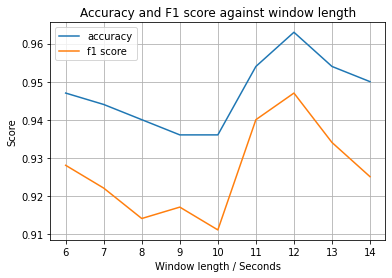

In [95]:
window_length_list = [6,7,8,9,10,11,12,13,14]
accuracy_list = [0.947, 0.944, 0.940,0.936 , 0.936, 0.954,0.963,0.954, 0.950]
f1_score_list =[0.928, 0.922, 0.914 ,0.917 , 0.911, 0.940, 0.947,0.934,0.925]

fig, ax = plt.subplots()
ax.plot(window_length_list, accuracy_list, label = 'accuracy')
ax.plot(window_length_list, f1_score_list, label = 'f1 score')

ax.set(xlabel='Window length / Seconds', ylabel='Score',
       title='Accuracy and F1 score against window length')
ax.grid()
plt.legend()

plt.show()